In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define the expected color distribution percentages (2008 expected percentages)
expected_percentages = {
    'Blue': 24,
    'Orange': 20,
    'Green': 16,
    'Yellow': 14,
    'Red': 13,
    'Brown': 13
}

# Step 2: Define the observed counts from the sample of 410 M&Ms
observed_counts = {
    'Blue': 105,
    'Orange': 91,
    'Green': 70,
    'Yellow': 50,
    'Red': 45,
    'Brown': 49
}

# Total sample size
total_sample_size = 410

In [3]:
# Step 3: Calculate the expected counts
expected_counts = {color: total_sample_size * (percentage / 100) for color, percentage in expected_percentages.items()}

# Step 4: Calculate the chi-square statistic
observed_values = np.array(list(observed_counts.values()))
expected_values = np.array(list(expected_counts.values()))

chi_square_stat, p_value = stats.chisquare(observed_values, expected_values)

# Degrees of freedom: df = number of categories - 1
df = len(expected_percentages) - 1

# Step 5: Determine the critical value for the chi-square distribution
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)


In [4]:
# Step 6: Decision Rule
if chi_square_stat > critical_value:
    decision = "Reject the null hypothesis: The color distribution has changed since 2008."
else:
    decision = "Fail to reject the null hypothesis: No significant change in the color distribution."

# Step 7: Output results
results = {
    'Chi-square statistic': chi_square_stat,
    'p-value': p_value,
    'Critical value': critical_value,
    'Decision': decision
}

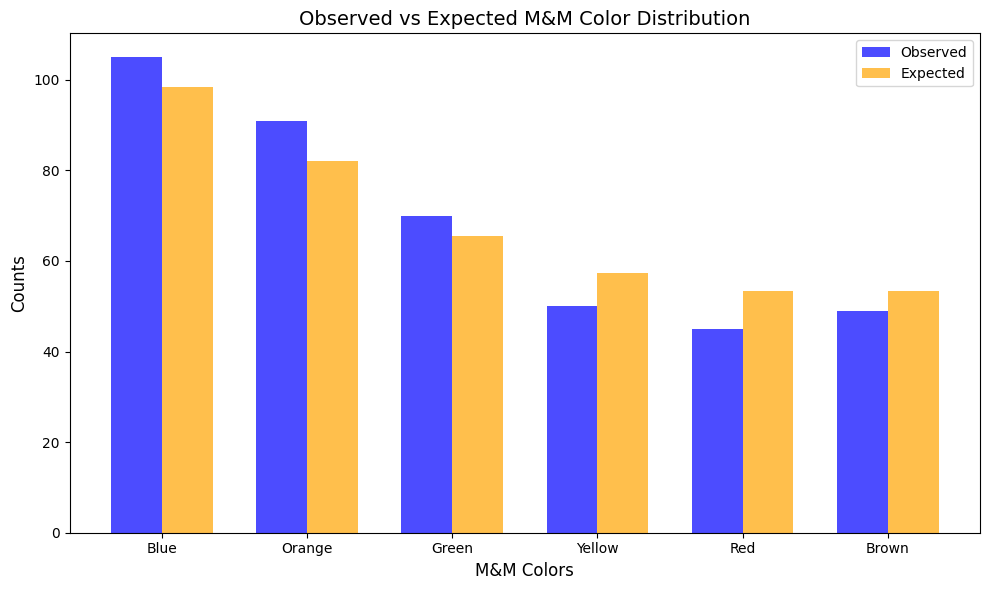

In [5]:
# Plot the observed vs expected counts for visual comparison
colors = list(expected_counts.keys())
observed_values = list(observed_counts.values())
expected_values = list(expected_counts.values())

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(colors))

# Bar plots for observed and expected counts
bar1 = ax.bar(index, observed_values, bar_width, label='Observed', color='blue', alpha=0.7)
bar2 = ax.bar(index + bar_width, expected_values, bar_width, label='Expected', color='orange', alpha=0.7)

# Add labels and title
ax.set_xlabel('M&M Colors', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Observed vs Expected M&M Color Distribution', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(colors)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
results

{'Chi-square statistic': 4.319016349504159,
 'p-value': 0.50445712119607,
 'Critical value': 11.070497693516351,
 'Decision': 'Fail to reject the null hypothesis: No significant change in the color distribution.'}